In [1]:
import pandas as pd
import yfinance as yf
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose as sdp
import sys
import os

sys.path.append(os.path.abspath("../"))
from fonctions.collect_data import get_crypto_data
from fonctions.fonction_calcul import calcul_z_scrore





In [2]:
# Install the prophet package
%pip install prophet

from prophet import Prophet

Note: you may need to restart the kernel to use updated packages.


d:\M1 DA\Analyse-comparative-entre-Bitcoin-et-Ethereum\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Projet

In [3]:
btc_data = get_crypto_data("BTC-USD","2017-11-09")
eth_data = get_crypto_data("ETH-USD","2017-11-09")

In [4]:
btc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,7446.830078,7446.830078,7101.520020,7143.580078,3226249984,0.0,0.0
2017-11-10 00:00:00+00:00,7173.729980,7312.000000,6436.870117,6618.140137,5208249856,0.0,0.0
2017-11-11 00:00:00+00:00,6618.609863,6873.149902,6204.220215,6357.600098,4908680192,0.0,0.0
2017-11-12 00:00:00+00:00,6295.450195,6625.049805,5519.009766,5950.069824,8957349888,0.0,0.0
2017-11-13 00:00:00+00:00,5938.250000,6811.189941,5844.290039,6559.490234,6263249920,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-19 00:00:00+00:00,82718.804688,87021.187500,82569.726562,86854.226562,34931960257,0.0,0.0
2025-03-20 00:00:00+00:00,86872.953125,87443.265625,83647.195312,84167.195312,29028988961,0.0,0.0
2025-03-21 00:00:00+00:00,84164.539062,84782.273438,83171.070312,84043.242188,19030452299,0.0,0.0


In [5]:
eth_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-19 00:00:00+00:00,1932.544556,2068.764404,1928.249512,2057.749023,20065206266,0.0,0.0
2025-03-20 00:00:00+00:00,2057.951172,2067.483643,1952.243286,1982.099854,13217865782,0.0,0.0
2025-03-21 00:00:00+00:00,1981.853027,1994.891479,1937.211548,1964.847534,9708125480,0.0,0.0


In [6]:
data = pd.DataFrame({
    'BTC_Close': btc_data['Close'],
    'ETH_Close': eth_data['Close']
})
data

,BTC_Close,ETH_Close
Date,,
2017-11-09 00:00:00+00:00,7143.580078,320.884003
2017-11-10 00:00:00+00:00,6618.140137,299.252991
2017-11-11 00:00:00+00:00,6357.600098,314.681000
2017-11-12 00:00:00+00:00,5950.069824,307.907990
2017-11-13 00:00:00+00:00,6559.490234,316.716003
...,...,...
2025-03-19 00:00:00+00:00,86854.226562,2057.749023
2025-03-20 00:00:00+00:00,84167.195312,1982.099854
2025-03-21 00:00:00+00:00,84043.242188,1964.847534


In [7]:
data["SMA_BTC_20"] = data["BTC_Close"].rolling(window=20).mean()  #Moyenne mobile sur les 20 mois
data["SMA_BTC_50"] = data["BTC_Close"].rolling(window=50).mean()  #Moyenne mobile sur les 50 mois
data["EMA_BTC"] = data["BTC_Close"].ewm(span=20, adjust=False).mean()  #Moyenne exponentielle 
data


,BTC_Close,ETH_Close,SMA_BTC_20,SMA_BTC_50,EMA_BTC
Date,,,,,
2017-11-09 00:00:00+00:00,7143.580078,320.884003,NaN,NaN,7143.580078
2017-11-10 00:00:00+00:00,6618.140137,299.252991,NaN,NaN,7093.538179
2017-11-11 00:00:00+00:00,6357.600098,314.681000,NaN,NaN,7023.448838
2017-11-12 00:00:00+00:00,5950.069824,307.907990,NaN,NaN,6921.222265
2017-11-13 00:00:00+00:00,6559.490234,316.716003,NaN,NaN,6886.771596
...,...,...,...,...,...
2025-03-19 00:00:00+00:00,86854.226562,2057.749023,85137.416016,91947.174375,85660.091716
2025-03-20 00:00:00+00:00,84167.195312,1982.099854,85127.125391,91556.454062,85517.911106
2025-03-21 00:00:00+00:00,84043.242188,1964.847534,85027.691797,91142.612812,85377.466447


In [8]:
data["SMA_ETH_20"] = data["ETH_Close"].rolling(window=20).mean()  #Moyenne mobile sur les 20 mois
data["SMA_ETH_50"] = data["ETH_Close"].rolling(window=50).mean()  #Moyenne mobile sur les 50 mois
data["EMA_ETH"] = data["ETH_Close"].ewm(span=20, adjust=False).mean()  #Moyenne exponentielle
data

,BTC_Close,ETH_Close,SMA_BTC_20,SMA_BTC_50,EMA_BTC,SMA_ETH_20,SMA_ETH_50,EMA_ETH
Date,,,,,,,,
2017-11-09 00:00:00+00:00,7143.580078,320.884003,NaN,NaN,7143.580078,NaN,NaN,320.884003
2017-11-10 00:00:00+00:00,6618.140137,299.252991,NaN,NaN,7093.538179,NaN,NaN,318.823906
2017-11-11 00:00:00+00:00,6357.600098,314.681000,NaN,NaN,7023.448838,NaN,NaN,318.429344
2017-11-12 00:00:00+00:00,5950.069824,307.907990,NaN,NaN,6921.222265,NaN,NaN,317.427310
2017-11-13 00:00:00+00:00,6559.490234,316.716003,NaN,NaN,6886.771596,NaN,NaN,317.359567
...,...,...,...,...,...,...,...,...
2025-03-19 00:00:00+00:00,86854.226562,2057.749023,85137.416016,91947.174375,85660.091716,2064.741730,2468.754031,2088.855036
2025-03-20 00:00:00+00:00,84167.195312,1982.099854,85127.125391,91556.454062,85517.911106,2051.951459,2446.136047,2078.687875
2025-03-21 00:00:00+00:00,84043.242188,1964.847534,85027.691797,91142.612812,85377.466447,2039.361670,2420.477397,2067.845938


In [9]:


fig = px.line(data, x=data.index, y=["SMA_BTC_20", "SMA_BTC_50", "EMA_BTC"],
              labels={"value": "Prix du BTC", "variable": "Indicateurs"},
              title="BTC - Moyennes Mobiles Simples & Exponentielle")


fig.update_layout(
    xaxis=dict(rangeslider=dict(visible=True)),  # Ajout d'un slider pour zoomer
    dragmode='zoom',  # Mode zoom activé par défaut
    hovermode="x",  # Affichage des valeurs en survolant l'axe X
)


# Affichage du graphique
fig.show()



In [10]:
fig_eth = px.line(data, x=data.index, y=["SMA_ETH_20", "SMA_ETH_50", "EMA_ETH"],
              labels={"value": "Prix du ETH", "variable": "Indicateurs"},
              title="ETH - Moyennes Mobiles Simples & Exponentielle")

fig_eth.update_layout(
    xaxis=dict(rangeslider=dict(visible=True)),  # Ajout d'un slider pour zoomer
    dragmode='zoom',  # Mode zoom activé par défaut
    hovermode="x",  # Affichage des valeurs en survolant l'axe X
)
# Affichage du graphique
fig_eth.show()

In [11]:
scaler = MinMaxScaler()

In [12]:
data[["SMA_BTC_20_Norm", "SMA_ETH_20_Norm"]] = scaler.fit_transform(data[["SMA_BTC_20", "SMA_ETH_20"]])

# Visualisation avec Plotly
fig_norm_20 = px.line(data, x=data.index, y=["SMA_BTC_20_Norm", "SMA_ETH_20_Norm"],
              labels={"value": "Prix normalisé", "variable": "Crypto"},
              title="Comparaison normalisée de la  moyenne mobile sur 20 du BTC et de l'ETH")

# Affichage du graphique
fig_norm_20.show()

In [13]:
data[["SMA_BTC_50_Norm", "SMA_ETH_50_Norm"]] = scaler.fit_transform(data[["SMA_BTC_50", "SMA_ETH_50"]])

# Visualisation avec Plotly
fig_norm_50 = px.line(data, x=data.index, y=["SMA_BTC_50_Norm", "SMA_ETH_50_Norm"],
              labels={"value": "Prix normalisé", "variable": "Crypto"},
              title="Comparaison normalisée de la  moyenne mobile sur 50  du BTC et de l'ETH")

# Affichage du graphique
fig_norm_50.show()

In [14]:
data[["EMA_BTC_Norm", "EMA_ETH_Norm"]] = scaler.fit_transform(data[["EMA_BTC", "EMA_ETH"]])

# Visualisation avec Plotly
fig_norm_ema = px.line(data, x=data.index, y=["EMA_BTC_Norm", "EMA_ETH_Norm"],
              labels={"value": "Prix normalisé", "variable": "Crypto"},
              title="Comparaison normalisée de la moyenne mobile exponentielle BTC et de l'ETH")

# Affichage du graphique
fig_norm_ema.show()

In [15]:
btc_data_z_scrore=data.loc['2024-12-01':'2024-12-31']
eth_data_z_scrore=data.loc['2024-12-01':'2024-12-31']
eth_data_z_scrore = calcul_z_scrore(eth_data_z_scrore,'ETH_Close',7)
btc_data_z_scrore = calcul_z_scrore(btc_data_z_scrore,'BTC_Close',7)

btc_data_z_scrore.head()



d:\M1 DA\Analyse-comparative-entre-Bitcoin-et-Ethereum\fonctions\fonction_calcul.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\M1 DA\Analyse-comparative-entre-Bitcoin-et-Ethereum\fonctions\fonction_calcul.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,BTC_Close,ETH_Close,SMA_BTC_20,SMA_BTC_50,EMA_BTC,SMA_ETH_20,SMA_ETH_50,EMA_ETH,SMA_BTC_20_Norm,SMA_ETH_20_Norm,SMA_BTC_50_Norm,SMA_ETH_50_Norm,EMA_BTC_Norm,EMA_ETH_Norm,Z_SCRORE
Date,,,,,,,,,,,,,,,
2024-12-01 00:00:00+00:00,97279.789062,3711.165039,93783.657031,79744.546094,92184.646776,3332.061572,2925.632764,3351.802936,0.910909,0.729497,0.795680,0.662444,0.901280,0.740655,NaN
2024-12-02 00:00:00+00:00,95865.304688,3644.198486,94179.131641,80404.824688,92535.185625,3351.958630,2949.163193,3379.650132,0.914900,0.733984,0.802585,0.667996,0.904843,0.747001,NaN
2024-12-03 00:00:00+00:00,96002.164062,3620.711670,94450.031641,81003.945469,92865.374047,3373.364417,2968.999429,3402.608373,0.917634,0.738812,0.808850,0.672677,0.908200,0.752233,NaN
2024-12-04 00:00:00+00:00,98768.531250,3841.331055,95025.936719,81638.493906,93427.579495,3412.483533,2993.705610,3444.391486,0.923446,0.747634,0.815487,0.678507,0.913915,0.761754,NaN
2024-12-05 00:00:00+00:00,96593.570312,3811.008301,95302.314844,82218.110937,93729.102430,3447.881921,3017.703735,3479.307373,0.926235,0.755617,0.821548,0.684169,0.916980,0.769710,NaN


In [16]:
fig_btc_z_cr = px.line(btc_data_z_scrore, x=btc_data_z_scrore.index, y="Z_SCRORE",
              labels={"BTC_ZScore": "Z-Score BTC", "Date": "Temps"},
              title="BTC - Z-Score sur 1 Mois")

fig_btc_z_cr.show()

In [17]:
fig_eth_z_cr = px.line(eth_data_z_scrore, x=eth_data_z_scrore.index, y="Z_SCRORE",
              labels={"BTC_ZScore": "Z-Score BTC", "Date": "Temps"},
              title="ETH - Z-Score sur 1 Mois")

fig_eth_z_cr.show()

In [18]:
data_sdp=sdp(data['BTC_Close'],period=365,extrapolate_trend='freq')
print(data_sdp)

# Visualisation de la tendance
fig_trend = px.line(x=data.index, y=data_sdp.trend,
              labels={"y": "Tendance BTC", "x": "Temps"},
              title="BTC - Tendance extraite sur 1 an")

fig_trend.show()

In [19]:
# Visualisation de la saisonnalité
fig_seasonal = px.line(x=data.index, y=data_sdp.seasonal,
              labels={"y": "Saisonnalité BTC", "x": "Temps"},
              title="BTC - Composante saisonnière extraite")

fig_seasonal.show()

In [20]:
# Visualisation des résidus
fig_residual = px.line(x=data.index, y=data_sdp.resid,
              labels={"y": "Résidu BTC", "x": "Temps"},
              title="BTC - Composante résiduelle extraite")

fig_residual.show()

# Testons la stationnarité avec Augmented Dickey-Fuller (ADF)

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['BTC_Close'].dropna())  
print(f"p-value: {adf_test[1]}") 


p-value: 0.8819764229677547


 p-value < 0.05 → La saisonnalité extraite est stationnaire 📉

🔹 Cela signifie que la moyenne et la variance de la saisonnalité ne changent pas significativement au fil du temps.

🔹 Conclusion :

La saisonnalité est bien extraite ✅
Elle peut être utilisée pour des modèles de prévision sans transformations supplémentaires.
Il n’y a pas de tendance résiduelle dans la composante saisonnière, ce qui est bon signe.

In [22]:
adf_test

(np.float64(-0.5495629136395143),
 np.float64(0.8819764229677547),
 28,
 2663,
 {'1%': np.float64(-3.432807985211508),
  '5%': np.float64(-2.8626259540301553),
  '10%': np.float64(-2.5673480904338657)},
 np.float64(45293.158426213864))

## Utilisation du modèle prophet pour prédire les prix du BTC

In [ ]:
data_prophet = data.reset_index()
#selectionner 'date et' et 'BTC_Close' pour le modèle prophet

data_prophet = data_prophet[['Date', 'BTC_Close']]
data_prophet.columns = ['ds', 'y']
data_prophet['ds'] = pd.to_datetime(data_prophet['ds']).dt.date
data_prophet

,ds,y
0,2017-11-09,7143.580078
1,2017-11-10,6618.140137
2,2017-11-11,6357.600098
3,2017-11-12,5950.069824
4,2017-11-13,6559.490234
...,...,...
2687,2025-03-19,86854.226562
2688,2025-03-20,84167.195312
2689,2025-03-21,84043.242188
2690,2025-03-22,83832.484375


07:16:33 - cmdstanpy - INFO - Chain [1] start processing
07:16:35 - cmdstanpy - INFO - Chain [1] done processing


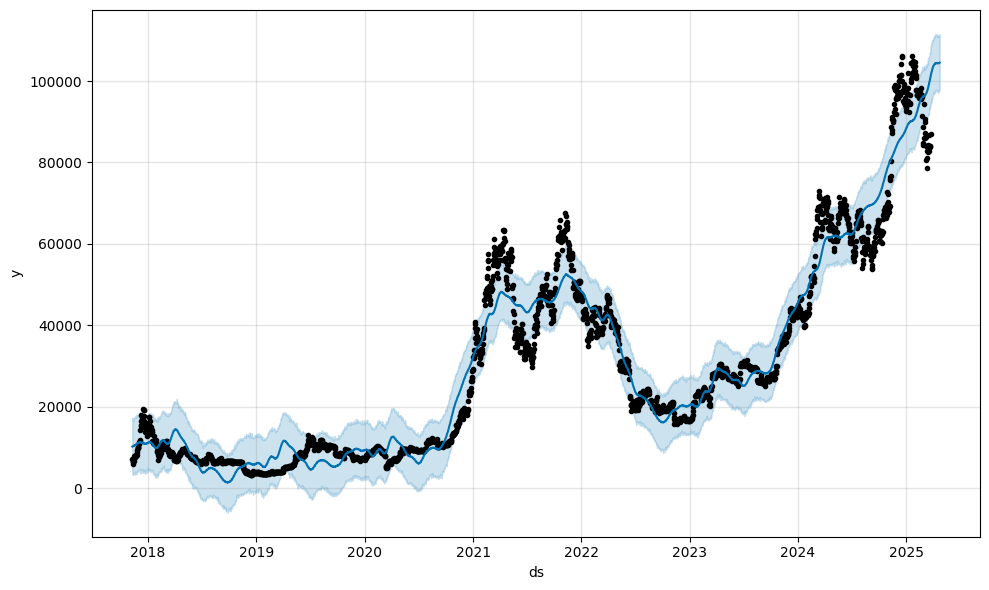

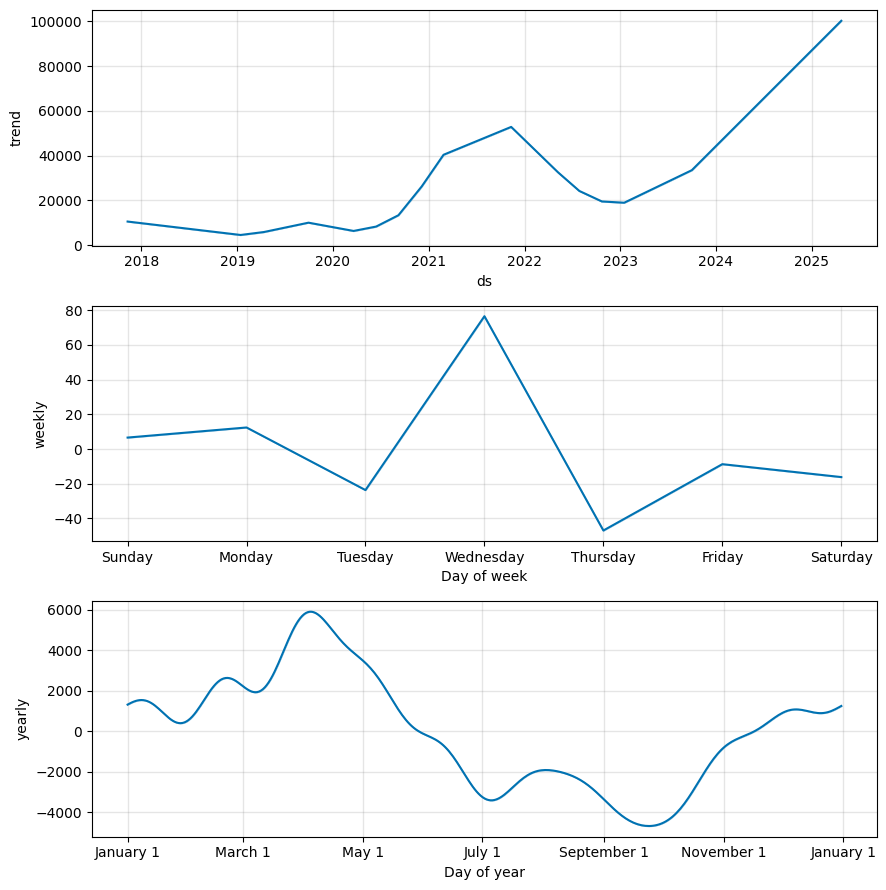

In [33]:
# Créer un modèle Prophet
m = Prophet()

# Apprendre le modèle
m.fit(data_prophet)
future = m.make_future_dataframe(periods=30) # Prédire les prochains 30 jours
forecast = m.predict(future)

# Afficher les prévisions

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)